## Simple Linear Regression notebook

- learn how we can import sklearn libraries
- how we instantiate models
- how we fit the model
- how we come up with predictions

In [2]:
# import analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn libraries
from sklearn.linear_model import LinearRegression # this is the actual model
from sklearn.metrics import mean_squared_error, r2_score # this are for evaluation

In [4]:
# Data loading
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
cf_data = fetch_california_housing() # bunch file - similar to a dictionary
df = pd.DataFrame(cf_data.data, columns=cf_data.feature_names)
df['Price'] = cf_data.target

# Display sample data
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


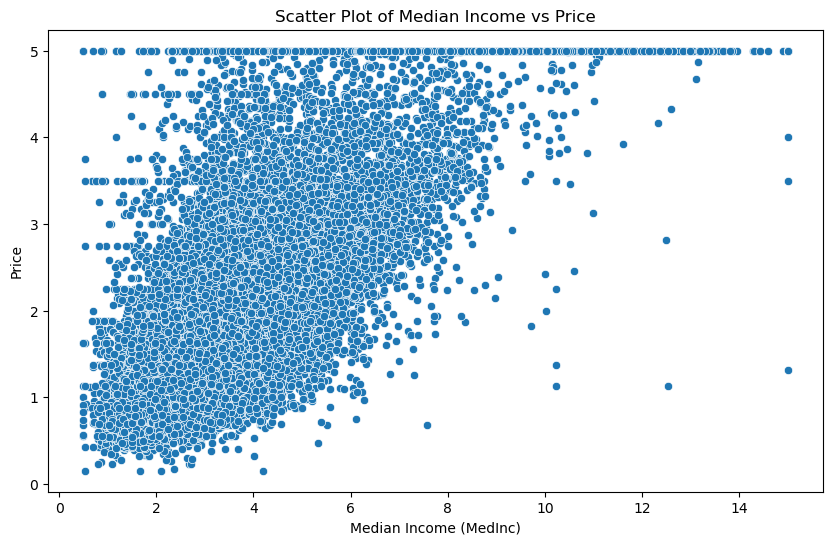

In [30]:
## Scatter plot showing the relationship between MedInc and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MedInc', y='Price')
plt.title('Scatter Plot of Median Income vs Price')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Price')
plt.show()

### Data Splitting 

- Features: this are the independent variable that will be used to predict the dependent varible
- Target: This is the dependent variable (what we are trying to predict)

In [17]:
# spit the data into features and target variable
X = df[["MedInc"]] # this value needs to be 2D
y = df["Price"] # this value can be 1D

### Model fitting


1. split data into training and test set
2. Instantiate the model
3. fit the model to your training data
4. Evaluate model using test

In [19]:
# instantiate the model
lr_model = LinearRegression()

# fit th model
lr_model.fit(X, y)

# make predictions
y_pred = lr_model.predict(X)

In [31]:
df.sample(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
2257,2.0469,19.0,4.569014,1.092958,1463.0,2.060563,36.8,-119.84,0.669


In [32]:
print("predicted value: (1.563)", 0.42 * 2.5057 + 0.45)
print("predicted value: (1.45)", 0.42 * 2.0469 + 0.45)

predicted value: (1.563) 1.502394
predicted value: (1.45) 1.309698


In [ ]:
# print the model coefficients and intercept
print(f"Coefficient: {lr_model.coef_[0]}")
print(f"Intercept: {lr_model.intercept_}")

# y = 0.42 * MedInc + 0.45

Coefficient: 0.41793849201896255
Intercept: 0.4508557670326798


In [20]:
# print the mean squared error and r2 score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.70
R^2 Score: 0.47


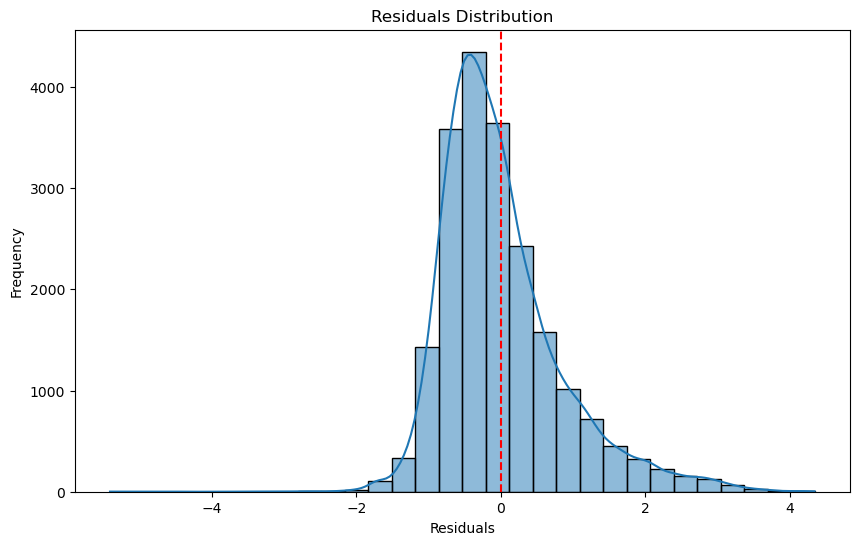

In [27]:
## Residual plot

residuals = y - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

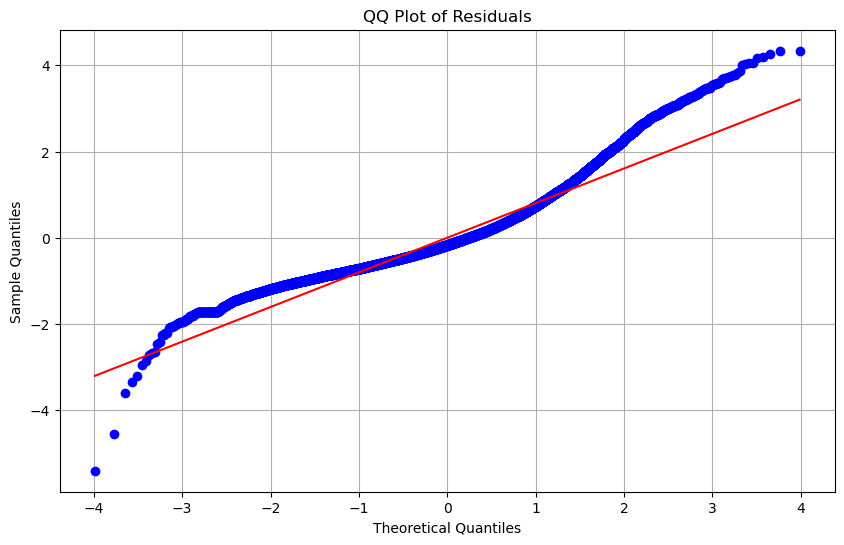

In [28]:
## QQ Plot
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

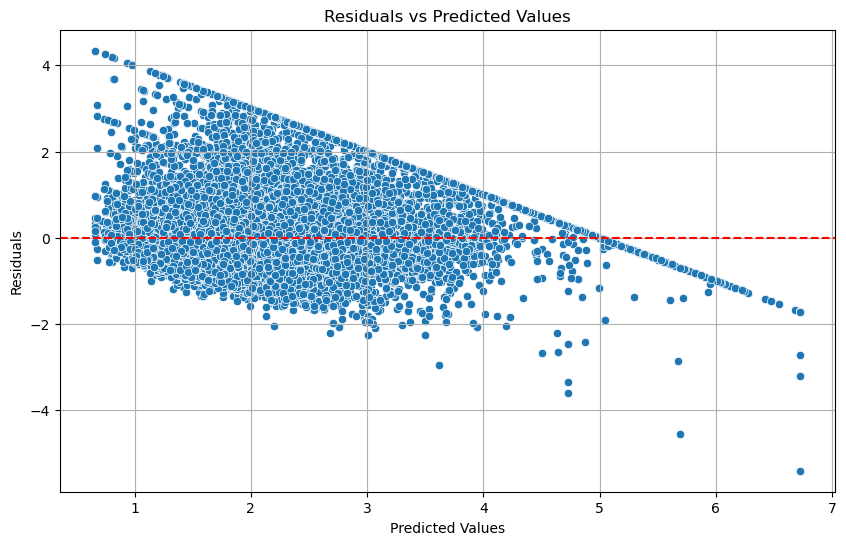

In [29]:
## Residuals vs Predicted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

## bonus Section

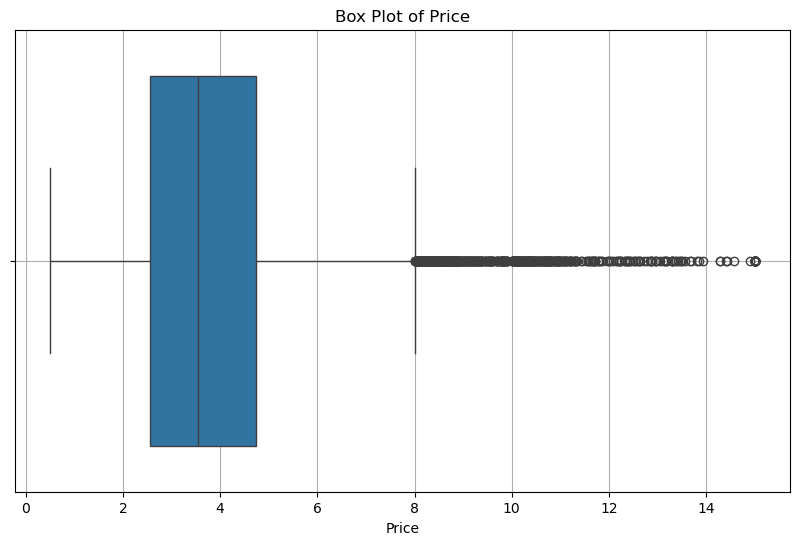

In [ ]:
## Check for outliers using a box plot

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MedInc'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.grid()
plt.show()

In [35]:
## remove by defining the quatile ranges

q_low = df["MedInc"].quantile(0.01)
q_high = df["MedInc"].quantile(0.99)


df_filtered = df[(df["MedInc"] > q_low) & (df["MedInc"] < q_high)]

In [36]:
# spit the data into features and target variable
X = df_filtered[["MedInc"]] # this value needs to be 2D
y = df_filtered["Price"] # this value can be 1D

In [37]:
# instantiate the model
lr_model = LinearRegression()

# fit th model
lr_model.fit(X, y)

# make predictions
y_pred = lr_model.predict(X)

In [38]:
# print the mean squared error and r2 score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.69
R^2 Score: 0.46


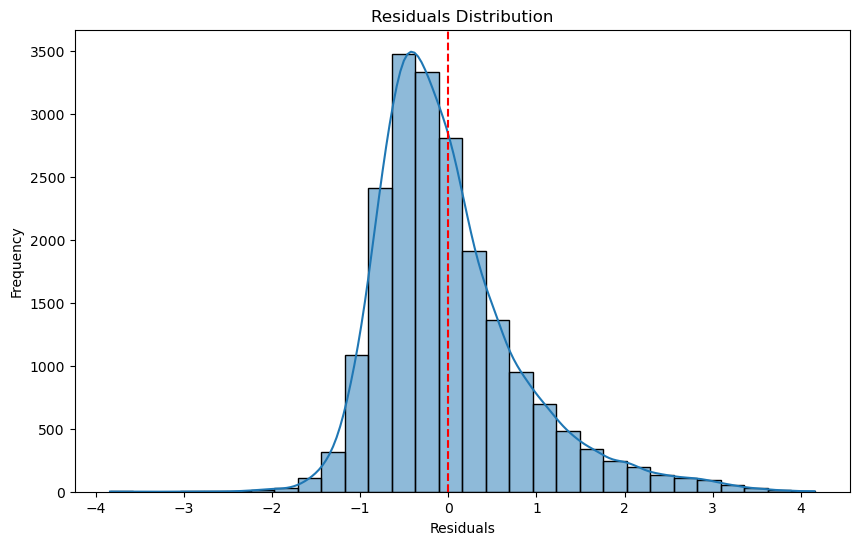

In [39]:
## Residual plot

residuals = y - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [40]:
## dentify outliers using Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(df_filtered['MedInc']))
outliers = df_filtered[(z_scores > 3)]
print("Outliers based on Z-score method:")
print(outliers)

Outliers based on Z-score method:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
155     8.8793      52.0  8.972868   1.131783       861.0  3.337209     37.81   
407     8.8342      52.0  8.345205   1.021918       975.0  2.671233     37.89   
409    10.0825      52.0  8.209016   1.024590       658.0  2.696721     37.90   
494     9.3959      52.0  7.512097   0.955645      1366.0  2.754032     37.85   
923     9.7194       9.0  8.306261   0.976311      1981.0  3.351946     37.49   
...        ...       ...       ...        ...         ...       ...       ...   
20335   8.9063       5.0  8.944643   1.100893      4253.0  3.797321     34.24   
20376  10.2614      16.0  6.421277   0.919149       578.0  2.459574     34.16   
20380  10.1597      16.0  7.606936   1.121387       450.0  2.601156     34.14   
20389  10.0595      26.0  8.692308   1.076923       573.0  3.148352     34.19   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.